In [1]:
import pandas as pd
df = pd.read_csv('/Users/mikeyraffanti/Documents/stat451/Project/data.csv')
df.head(6)
df['result'].value_counts()

1    2370
0    2009
Name: result, dtype: int64

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVR

In [3]:
X = df[['Transformed_prev_Close_1', 'Transformed_prev_Close_2', 'Transformed_prev_Close_3', 'Transformed_prev_Close_4', 'Transformed_prev_Close_5']]
Y = df['result']

In [4]:
# split_index = int(len(X) * 0.8)  # 80% of the length of the dataset",
# X_train, X_test = X[:split_index], X[split_index:]
# y_train, y_test = Y[:split_index], Y[split_index:]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0) # 20% of data set aside for test leaving 80% for training
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

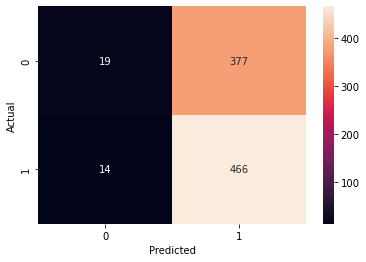

In [6]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

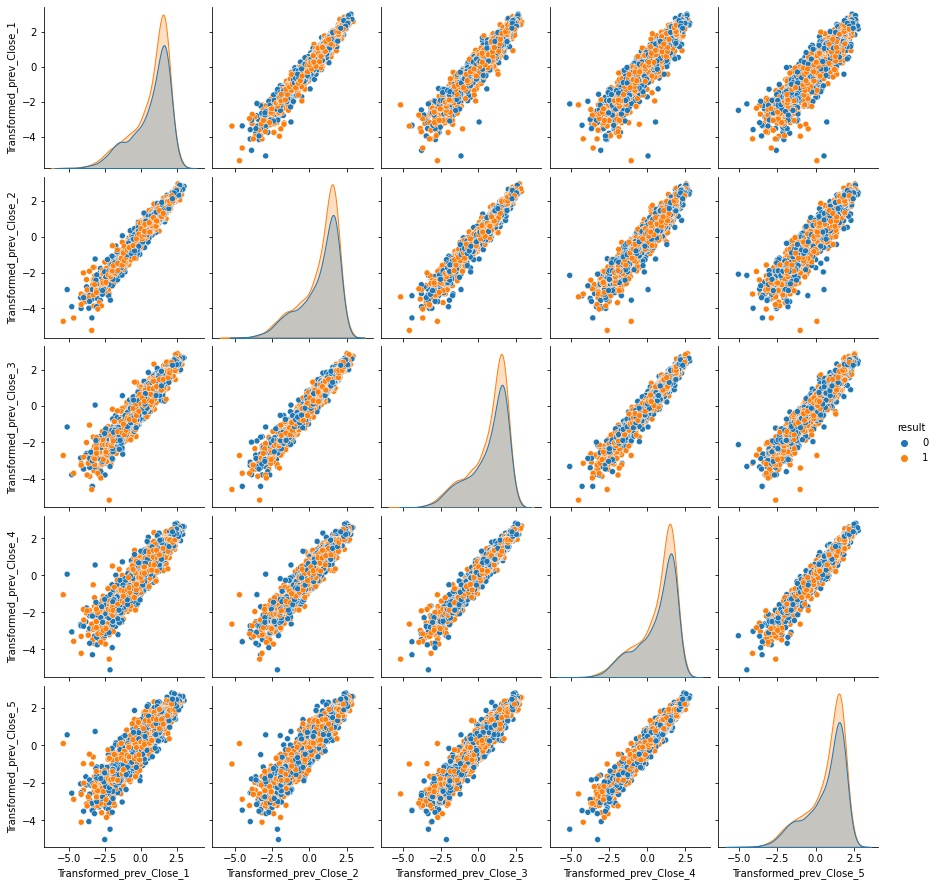

In [7]:
sns.pairplot(df[['Transformed_prev_Close_1', 'Transformed_prev_Close_2', 'Transformed_prev_Close_3', 'Transformed_prev_Close_4', 'Transformed_prev_Close_5', 'result']], hue='result')
plt.show()

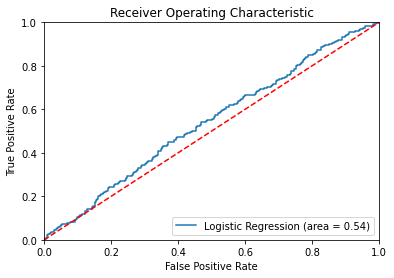

In [8]:
y_pred_prob = log_reg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [9]:
print(log_reg.coef_[0])

[-0.27742129  0.3462163  -0.09654425  0.08299841 -0.03199727]


[-0.27742129  0.3462163  -0.09654425  0.08299841 -0.03199727]


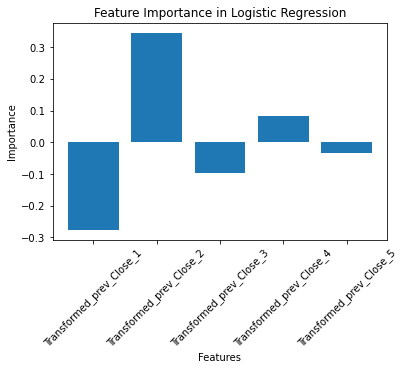

In [10]:
importance = log_reg.coef_[0]
print(importance)
features = X.columns
plt.bar(features, importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Logistic Regression')
plt.xticks(rotation=45)
plt.show()

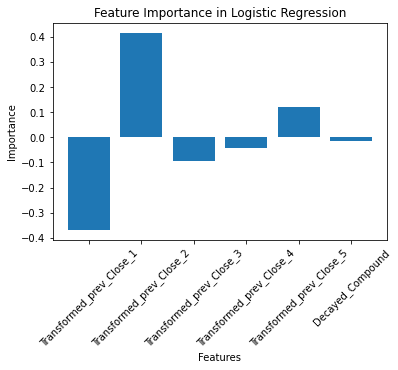

In [11]:
# Assuming 'decayed compound' is a column in your df DataFrame and you want to include it in your model
X = df[['Transformed_prev_Close_1', 'Transformed_prev_Close_2', 'Transformed_prev_Close_3', 'Transformed_prev_Close_4', 'Transformed_prev_Close_5', 'Decayed_Compound']]
Y = df['result']

log_reg = LogisticRegression()
log_reg.fit(X, Y)

# Get the coefficients from the logistic regression model
importance = log_reg.coef_[0]
features = X.columns

# Plotting the feature importances
plt.bar(features, importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Logistic Regression')
plt.xticks(rotation=45)  # Rotate the feature names on the x-axis for better readability
plt.show()

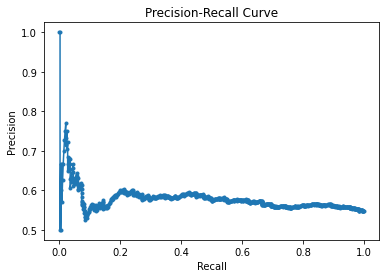

In [12]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.05      0.09       396
           1       0.55      0.97      0.70       480

    accuracy                           0.55       876
   macro avg       0.56      0.51      0.40       876
weighted avg       0.56      0.55      0.43       876



/Users/mikeyraffanti/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


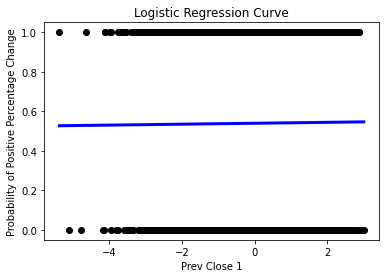

In [14]:
X_single = df[['Transformed_prev_Close_1']]
log_reg_single = LogisticRegression().fit(X_single, Y)

x_values = np.linspace(X_single.min(), X_single.max(), 300)
y_values = log_reg_single.predict_proba(x_values.reshape(-1, 1))[:, 1]

plt.scatter(X_single, Y, color='black', zorder=20)
plt.plot(x_values, y_values, color='blue', linewidth=3)
plt.xlabel('Prev Close 1')
plt.ylabel('Probability of Positive Percentage Change')
plt.title('Logistic Regression Curve')
plt.show()

In [15]:
df['change'] = df['Transformed_prev_Close_1'] - df['Transformed_prev_Close_5']
X = df[['change']]
Y = df['result']

log_reg = LogisticRegression()
log_reg.fit(X, Y)

LogisticRegression()

/Users/mikeyraffanti/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


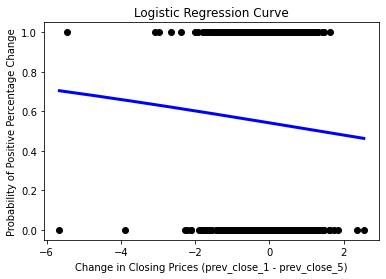

In [16]:
# Creating values for plotting
x_values = np.linspace(X['change'].min(), X['change'].max(), 300)
y_values = log_reg.predict_proba(x_values.reshape(-1, 1))[:, 1]

# Plotting
plt.scatter(X['change'], Y, color='black', zorder=20)
plt.plot(x_values, y_values, color='blue', linewidth=3)
plt.xlabel('Change in Closing Prices (prev_close_1 - prev_close_5)')
plt.ylabel('Probability of Positive Percentage Change')
plt.title('Logistic Regression Curve')
plt.show()

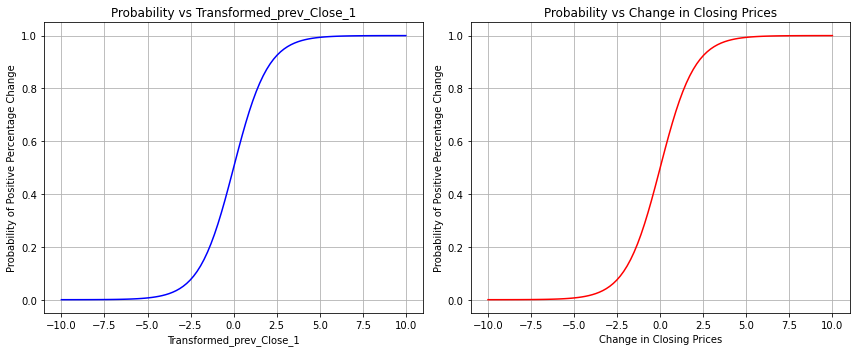

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit  # Sigmoid function for logistic curve

# Generating some dummy data
# For Transformed_prev_Close_1
x1 = np.linspace(-10, 10, 100)  # Range of values for Transformed_prev_Close_1
y1 = expit(x1)  # Applying the logistic function

# For change in closing prices (Transformed_prev_Close_1 - Transformed_prev_Close_5)
x2 = np.linspace(-10, 10, 100)  # Range of values for change in closing prices
y2 = expit(x2)  # Applying the logistic function

# Plotting
plt.figure(figsize=(12, 5))

# Plot for Transformed_prev_Close_1
plt.subplot(1, 2, 1)
plt.plot(x1, y1, color='blue')
plt.title('Probability vs Transformed_prev_Close_1')
plt.xlabel('Transformed_prev_Close_1')
plt.ylabel('Probability of Positive Percentage Change')
plt.grid(True)

# Plot for change in closing prices
plt.subplot(1, 2, 2)
plt.plot(x2, y2, color='red')
plt.title('Probability vs Change in Closing Prices')
plt.xlabel('Change in Closing Prices')
plt.ylabel('Probability of Positive Percentage Change')
plt.grid(True)

plt.tight_layout()
plt.show()


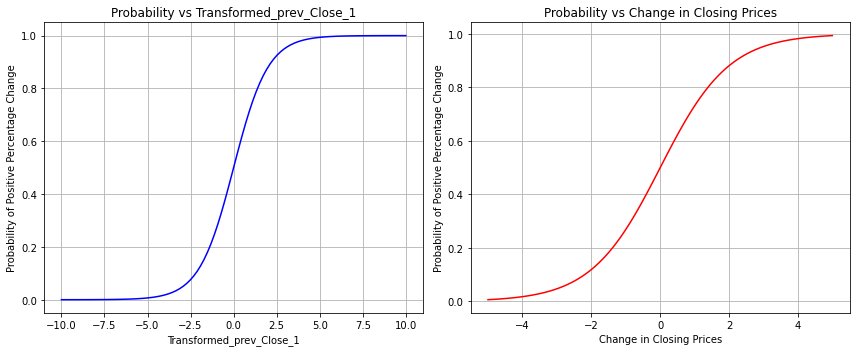

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit  # Sigmoid function for logistic curve

# For Transformed_prev_Close_1
x1 = np.linspace(-10, 10, 100)
y1 = expit(x1)

# For change in closing prices, assuming a smaller range
x2 = np.linspace(-5, 5, 100)  # Adjusted range
y2 = expit(x2)

# Plotting
plt.figure(figsize=(12, 5))

# Plot for Transformed_prev_Close_1
plt.subplot(1, 2, 1)
plt.plot(x1, y1, color='blue')
plt.title('Probability vs Transformed_prev_Close_1')
plt.xlabel('Transformed_prev_Close_1')
plt.ylabel('Probability of Positive Percentage Change')
plt.grid(True)

# Plot for change in closing prices
plt.subplot(1, 2, 2)
plt.plot(x2, y2, color='red')
plt.title('Probability vs Change in Closing Prices')
plt.xlabel('Change in Closing Prices')
plt.ylabel('Probability of Positive Percentage Change')
plt.grid(True)

plt.tight_layout()
plt.show()


In [19]:
# Sample DataFrame
# df = pd.DataFrame(data)

# Splitting the dataset
X_single = df[['Transformed_prev_Close_1']]  # Single feature
X_multiple = df[['Transformed_prev_Close_1', 'Transformed_prev_Close_2', 'Transformed_prev_Close_3', 'Transformed_prev_Close_4', 'Transformed_prev_Close_5']]  # Multiple features
y = df['result']

# Train Logistic Regression models
log_reg_single = LogisticRegression()
log_reg_multiple = LogisticRegression()

log_reg_single.fit(X_single, y)
log_reg_multiple.fit(X_multiple, y)

# Create a range of values for Transformed_prev_Close_1
x_range = np.linspace(X_single.min(), X_single.max(), 300).reshape(-1, 1)

# Predict probabilities
prob_single = log_reg_single.predict_proba(x_range)[:, 1]
prob_multiple = log_reg_multiple.predict_proba(x_range)[:, 1]

# Plot the logistic regression curves
plt.figure(figsize=(14, 7))

# Plot for single feature
plt.subplot(1, 2, 1)
plt.plot(x_range, prob_single, label='Single Feature')
plt.title('Logistic Regression with Transformed_prev_Close_1')
plt.xlabel('Transformed_prev_Close_1 (Standard Scaled)')
plt.ylabel('Probability of Positive Percent Change')

# Plot for multiple features - using Transformed_prev_Close_1 for x-axis
plt.subplot(1, 2, 2)
plt.plot(x_range, prob_multiple, label='Multiple Features')
plt.title('Logistic Regression with Transformed_prev_Close_1 to Transformed_prev_Close_5')
plt.xlabel('Transformed_prev_Close_1 (Standard Scaled)')
plt.ylabel('Probability of Positive Percent Change')

plt.tight_layout()
plt.show()


/Users/mikeyraffanti/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/mikeyraffanti/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ValueError: X has 1 features, but LogisticRegression is expecting 5 features as input.

In [ ]:
df['sma_5'] = df[['Transformed_prev_Close_1', 'Transformed_prev_Close_2', 'Transformed_prev_Close_3', 'Transformed_prev_Close_4', 'Transformed_prev_Close_5']].mean(axis=1)
df['ema_5'] = df[['Transformed_prev_Close_1', 'Transformed_prev_Close_2', 'Transformed_prev_Close_3', 'Transformed_prev_Close_4', 'Transformed_prev_Close_5']].ewm(span=5, adjust=False).mean().iloc[:, -1]

df['daily_change'] = df['Transformed_prev_Close_1'] - df['Transformed_prev_Close_2']
df['percent_change_5d'] = (df['Transformed_prev_Close_1'] - df['Transformed_prev_Close_5']) / df['Transformed_prev_Close_5'] * 100

In [ ]:
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()

    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df['rsi_14'] = calculate_rsi(df['Transformed_prev_Close_1'], window=14)

In [ ]:
df['middle_band'] = df['sma_5']
df['upper_band'] = df['middle_band'] + 2 * df[['Transformed_prev_Close_1', 'Transformed_prev_Close_2', 'Transformed_prev_Close_3', 'Transformed_prev_Close_4', 'Transformed_prev_Close_5']].std(axis=1)
df['lower_band'] = df['middle_band'] - 2 * df[['Transformed_prev_Close_1', 'Transformed_prev_Close_2', 'Transformed_prev_Close_3', 'Transformed_prev_Close_4', 'Transformed_prev_Close_5']].std(axis=1)

In [ ]:
df['volatility'] = df[['Transformed_prev_Close_1', 'Transformed_prev_Close_2', 'Transformed_prev_Close_3', 'Transformed_prev_Close_4', 'Transformed_prev_Close_5']].std(axis=1)

In [ ]:
for lag in range(1, 6):
    df[f'lag_{lag}'] = df['Transformed_prev_Close_1'].shift(lag)

In [ ]:
# You can plot the Simple Moving Average (SMA) and Exponential Moving Average (EMA) against the actual closing prices to see how they track the price over time.
plt.figure(figsize=(12, 6))
plt.plot(df['Transformed_prev_Close_1'], label='Actual Close', alpha=0.5)
plt.plot(df['sma_5'], label='SMA 5', alpha=0.7)
plt.plot(df['ema_5'], label='EMA 5', alpha=0.7)
plt.title('Simple and Exponential Moving Averages vs Actual Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
# To understand the short-term movements, you can visualize the daily change and the 5-day percentage change.
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

ax[0].plot(df['daily_change'])
ax[0].set_title('Daily Change in Closing Price')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Change in Price')

ax[1].plot(df['percent_change_5d'])
ax[1].set_title('5-Day Percentage Change in Closing Price')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Percentage Change')

plt.tight_layout()
plt.show()

In [ ]:
# Plotting the RSI can help identify potential overbought or oversold conditions
# RSI is a momentum oscillator that measures the speed and change of price movements
plt.figure(figsize=(12, 6))
plt.plot(df['rsi_14'])
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('Relative Strength Index (14-day)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.show()

In [ ]:
# Visualize the Bollinger Bands along with the actual closing prices.
# Bollinger Bands are envelopes plotted at a standard deviation level above and below a simple moving average of the price.
plt.figure(figsize=(12, 6))
plt.plot(df['Transformed_prev_Close_1'], label='Actual Close', alpha=0.5)
plt.plot(df['upper_band'], label='Upper Band', alpha=0.7)
plt.plot(df['middle_band'], label='Middle Band', alpha=0.7)
plt.plot(df['lower_band'], label='Lower Band', alpha=0.7)
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
# A plot of the volatility can be useful to see how unstable the stock prices are over time.
# Volatility is the degree of variation of a trading price series over time, usually measured by the standard deviation of logarithmic returns.

plt.figure(figsize=(12, 6))
plt.plot(df['volatility'])
plt.title('Volatility of Closing Prices')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()

In [ ]:
# A table showing correlations between the lagged features and the current closing price or the percentage change can be insightful.
# A correlation matrix is a statistical technique used to evaluate the relationship between two variables in a data set.

correlation_matrix = df[['Transformed_prev_Close_1', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Lagged Features')
plt.show()